In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
df = pd.read_csv('prices.txt', sep='\s+', header=None)
# Just to check if the data is read correctly

# print(df.describe()) 
# df[0].plot(kind='line')
# df[1].plot(kind='line')

In [58]:
# Simple Moving Average
# We can do this with convolutions from COMP3821 haha
def sma(data, window):
    # weights array is an array of '1/window'. Multiplying it with the data array will give us the 
    # moving average since '1/window * data' describes the average of each datapoint
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(data, weights, 'valid')
    return smas

In [64]:
# sma(df[0], 5).plot(kind='line')
print(len(sma(df[0], 5)))
print(len(df[0]))

496
500


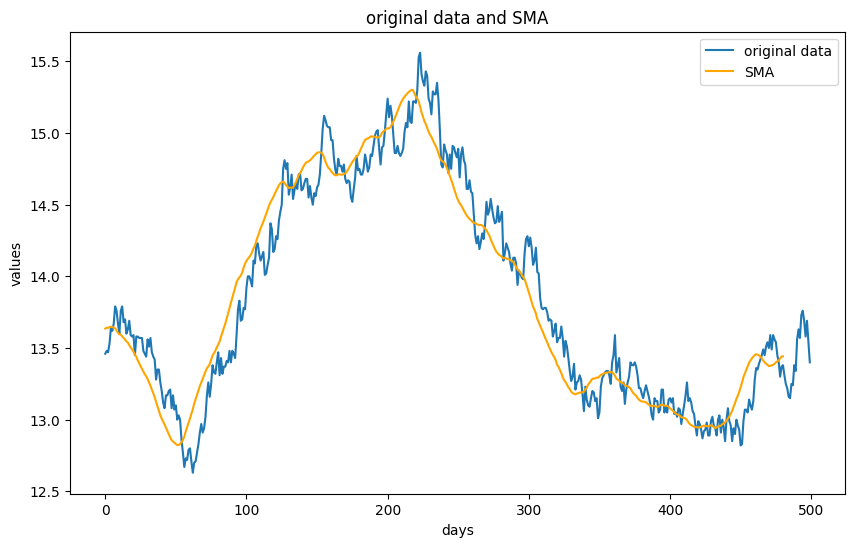

In [65]:
# 20 day window size
sma_values = sma(df[0], 20)

# convert the sma values to a pandas Series (basically a 1 dimensional dataframe) with the same index as the original data
sma_series = pd.Series(sma_values, index=df.index[:len(sma_values)])

# plot the original data and the SMA
plt.figure(figsize=(10, 6))
plt.plot(df[0], label='original data')
plt.plot(sma_series, label='SMA', color='orange')
plt.title('original data and SMA')
plt.xlabel('days')
plt.ylabel('values')
plt.legend()
plt.show()

Simply put:
- buy whenever the price is below the SMA (when the blue line below yellow line)
- sell whenever the price is above the SMA (when the blue line is above the yellow line)

We also need to think about how we deal with volatile stocks, and also how much to buy/sell based on the moving average.

Looking at the data, the SMA doesn't actually go up to the most recent day (the yellow line ends earlier than the blue line by 20 days - the window size).
We should pad the data to extend the SMA.

In [70]:
def sma_padded(data, window):
    # We pad (window - 1) and (0) (meaning that the SMA extends over the entire
    # data set)
    padded_data = np.pad(data, (window-1, 0), mode='edge')
    weights = np.repeat(1.0, window) / window
    smas = np.convolve(padded_data, weights, 'valid')
    return smas

500


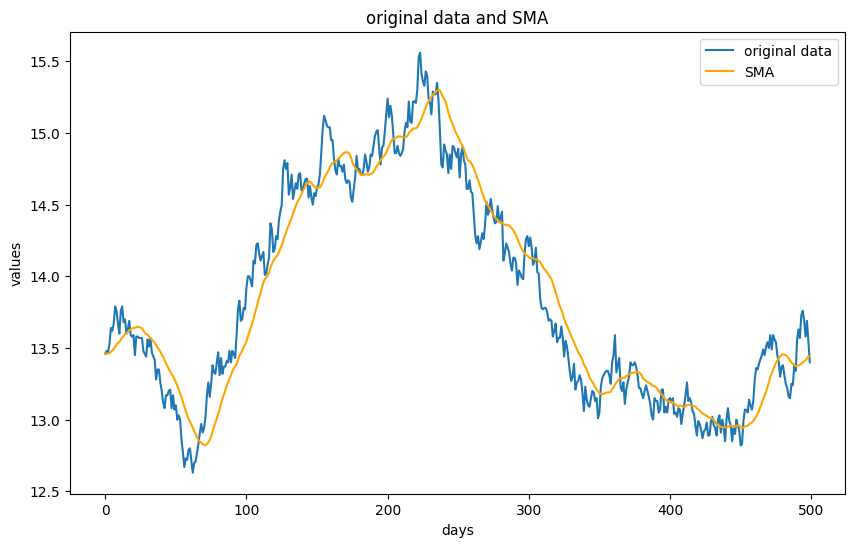

In [72]:
# 20 day window size
sma_values = sma_padded(df[0], 20)
print(len(sma_values)) # Its now the same length as the original data xd

# convert the sma values to a pandas Series (basically a 1 dimensional dataframe) with the same index as the original data
sma_series = pd.Series(sma_values, index=df.index[:len(sma_values)])

# plot the original data and the SMA
plt.figure(figsize=(10, 6))
plt.plot(df[0], label='original data')
plt.plot(sma_series, label='SMA', color='orange')
plt.title('original data and SMA')
plt.xlabel('days')
plt.ylabel('values')
plt.legend()
plt.show()